In [59]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import AdamW, Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [60]:
from tensorflow.keras.models import load_model

In [61]:
from keras.layers import LeakyReLU

In [62]:
from keras.regularizers import L1L2

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def build_model(hidden_layers, hidden_nodes, activation, output_activation, alpha):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(2*hidden_nodes))
    model.add(LeakyReLU(negative_slope=alpha))
    for i in range(hidden_layers-1):
        model.add(Dense(hidden_nodes))
        model.add(LeakyReLU(negative_slope=alpha))
    model.add(Dense(1, activation=output_activation))  # Output layer for regression
    return model

# Define function to evaluate model
def evaluate_model(params, callbacks):
    model = build_model(params['hidden_layers'], params['hidden_nodes'], 
                        params['activation'], params['output_activation'], params['alpha'])
    
    optimizer = params['optimizer'](learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss=params['loss_function'], metrics=['mean_squared_error','r2_score'])
    
    history = model.fit(X_train, y_train, epochs=1000, verbose=2, validation_split=0.2, callbacks=callbacks)
    return history, model

In [65]:
# Simulating a dataset
data = pd.read_csv("battle5_data.csv")


In [66]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [67]:
data

,OppLatVelocity,OppVelocity,Distance,BulletPower,ForwardWallDistance,BackWallDistance,TimeDecelerated,TimeChangedDir,Offset
0,7.999841,-8.0,490.392108,2.014834,620.405688,182.911575,9,3,0.555745
1,0.000000,0.0,518.746509,1.882826,569.040113,150.575470,0,7,-0.517823
2,0.890174,-1.0,253.931265,1.832468,173.640568,428.301006,8,9,0.590579
3,0.000000,-0.0,505.603847,1.399994,486.512290,500.229921,0,0,-0.748087
4,0.000000,0.0,536.414893,1.967852,339.776126,460.897763,220,147,0.000000
...,...,...,...,...,...,...,...,...,...
31853,3.017057,-8.0,219.970923,1.924196,198.228676,478.440401,159,5,0.694467
31854,-4.394829,8.0,494.809350,1.399994,466.302576,404.248000,12,1,0.694861
31855,7.987342,8.0,598.285439,1.959954,305.328507,304.005814,12,12,0.725428
31856,-5.517506,-6.0,591.984619,1.073906,223.532458,652.176565,0,19,-0.219313


In [68]:
# Preprocessing data
X = data.drop(columns=["Offset"]).values
y = data["Offset"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [69]:
best_params = {'hidden_nodes': 30, 'hidden_layers': 3, 'activation': 'relu', 'output_activation': 'tanh', 'alpha': 0.01, 'loss_function': 'log_cosh', 'learning_rate': 0.0001, 'optimizer': Adam}

In [70]:
early_stopping_plateau = EarlyStopping(monitor='val_loss', 
                                       patience=100,  # Number of epochs to wait after plateau
                                       verbose=1, 
                                       restore_best_weights=True, mode="min")

# ModelCheckpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_model7.keras',  # Filepath to save the model
                                   monitor='val_loss',  # Monitor validation loss
                                   save_best_only=True,  # Save only the best model
                                           verbose=0)

Epoch 1/1000
717/717 - 3s - 5ms/step - loss: 0.0917 - mean_squared_error: 0.1958 - r2_score: 0.0358 - val_loss: 0.0863 - val_mean_squared_error: 0.1845 - val_r2_score: 0.0869
Epoch 2/1000
717/717 - 1s - 2ms/step - loss: 0.0842 - mean_squared_error: 0.1795 - r2_score: 0.1164 - val_loss: 0.0836 - val_mean_squared_error: 0.1785 - val_r2_score: 0.1165
Epoch 3/1000
717/717 - 1s - 2ms/step - loss: 0.0820 - mean_squared_error: 0.1748 - r2_score: 0.1391 - val_loss: 0.0825 - val_mean_squared_error: 0.1762 - val_r2_score: 0.1277
Epoch 4/1000
717/717 - 2s - 2ms/step - loss: 0.0806 - mean_squared_error: 0.1719 - r2_score: 0.1536 - val_loss: 0.0815 - val_mean_squared_error: 0.1743 - val_r2_score: 0.1376
Epoch 5/1000
717/717 - 2s - 2ms/step - loss: 0.0797 - mean_squared_error: 0.1699 - r2_score: 0.1637 - val_loss: 0.0810 - val_mean_squared_error: 0.1730 - val_r2_score: 0.1439
Epoch 6/1000
717/717 - 1s - 2ms/step - loss: 0.0790 - mean_squared_error: 0.1683 - r2_score: 0.1715 - val_loss: 0.0805 - val_

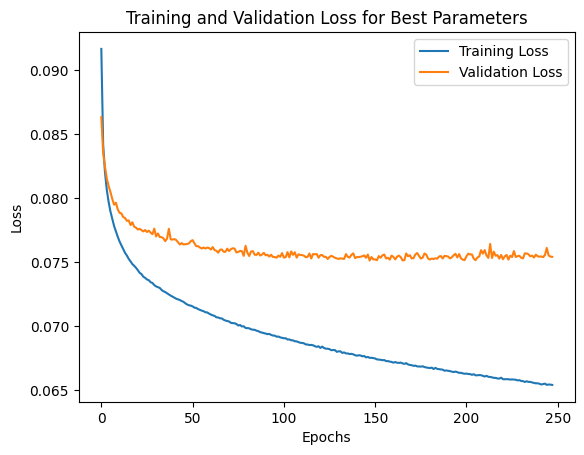

Final Best Parameters:
{'hidden_nodes': 30, 'hidden_layers': 3, 'activation': 'relu', 'output_activation': 'tanh', 'alpha': 0.01, 'loss_function': 'log_cosh', 'learning_rate': 0.0001, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>}


In [71]:
final_params = best_params
history, model = evaluate_model(final_params, callbacks=[early_stopping_plateau, model_checkpoint])

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Best Parameters')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# The final best set of parameters is stored in best_params
print("Final Best Parameters:")
print(best_params)

In [72]:
model.evaluate(X_test, y_test, verbose=1)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0731 - mean_squared_error: 0.1557 - r2_score: 0.2319


[0.07380123436450958, 0.15745912492275238, 0.22664278745651245]

In [73]:
model.predict(X_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ 0.49802664],
       [ 0.26029894],
       [-0.0631692 ],
       ...,
       [ 0.26418123],
       [ 0.23680475],
       [-0.06742041]], dtype=float32)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


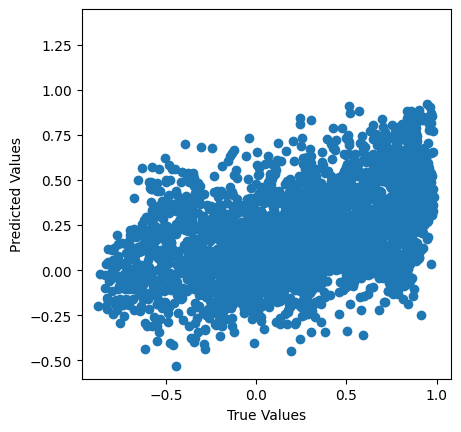

In [74]:
predictions = model.predict(X_test).flatten()

# Visualize predictions
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.axis('equal')
plt.axis('square')

plt.show()


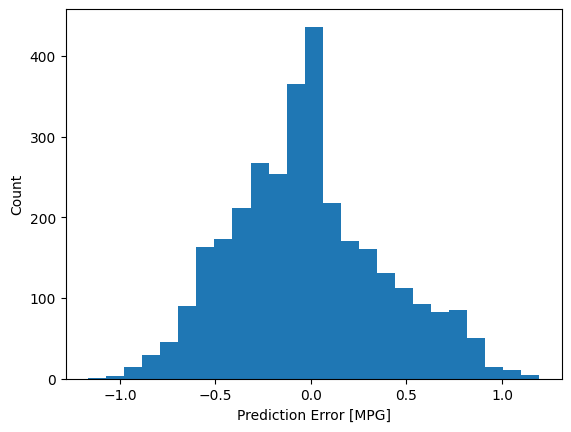

In [75]:
error = predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")